# Individual Coding Assignment #7
## Income and Poverty Profile of San Francisco
By: Abigail Adams

Date: January 23, 2025

In this file, I will be looking at ACS Survey Data from 2023 to explore the income profile of San Francisco residents by census tract. This information will inform our group project by helping us identify any correlation between dempraphic characteristics and access to public transportation in SF. I will focus on variables that pertain to income, poverty status, and family chracteristics because our project explores access near public high schools in SF.

## Import dataset and packages 
First, I will load the packages I am using. Then, I will load my ACS dataset and verify that it imported successfully. 

In [1]:
# import packages for visualizations 
import pandas as pd # for non spatial data 
import geopandas as gpd # for geo data
import folium # for interactive map
import matplotlib import colormaps
list(colormaps)

In [30]:
# load acs dataframe 
acs = pd.read_csv('wk3_acs.csv')

# check my work
acs.head(5)

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,...,SE_A10022_007,SE_A10022_008,PCT_SE_A10022_002,PCT_SE_A10022_003,PCT_SE_A10022_004,PCT_SE_A10022_005,PCT_SE_A10022_006,PCT_SE_A10022_007,PCT_SE_A10022_008,SE_A00001_001
0,6075010101,"Census Tract 101.01, San Francisco County, Cal...",ca,140,0,NaN,NaN,NaN,6,75,...,0,1177,2.89,2.89,2.89,0.00,0.00,0.00,97.11,2004
1,6075010102,"Census Tract 101.02, San Francisco County, Cal...",ca,140,0,NaN,NaN,NaN,6,75,...,15,690,23.93,22.27,1.98,1.21,19.07,1.65,76.07,1795
2,6075010201,"Census Tract 102.01, San Francisco County, Cal...",ca,140,0,NaN,NaN,NaN,6,75,...,54,1172,14.76,10.84,3.13,1.09,6.62,3.93,85.24,2608
3,6075010202,"Census Tract 102.02, San Francisco County, Cal...",ca,140,0,NaN,NaN,NaN,6,75,...,0,1031,5.50,5.50,3.57,0.00,1.92,0.00,94.50,1761
4,6075010300,"Census Tract 103, San Francisco County, Califo...",ca,140,0,NaN,NaN,NaN,6,75,...,0,2011,6.16,6.16,1.77,0.00,4.39,0.00,93.84,3791


## Data inspection
I will look at the data type, dimensions, and 

In [31]:
# look at data dimensions
acs.shape

(244, 271)

In [32]:
# look at data type
acs.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 271 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    Geo_FIPS            244 non-null    int64  
 1    Geo_QName           244 non-null    object 
 2    Geo_STUSAB          244 non-null    object 
 3    Geo_SUMLEV          244 non-null    int64  
 4    Geo_GEOCOMP         244 non-null    int64  
 5    Geo_US              0 non-null      float64
 6    Geo_REGION          0 non-null      float64
 7    Geo_DIVISION        0 non-null      float64
 8    Geo_STATE           244 non-null    int64  
 9    Geo_COUNTY          244 non-null    int64  
 10   Geo_COUSUB          0 non-null      float64
 11   Geo_PLACE           0 non-null      float64
 12   Geo_TRACT           244 non-null    int64  
 13   Geo_BLKGRP          0 non-null      float64
 14   Geo_CONCIT          0 non-null      float64
 15   Geo_AIANHH          0 non-null      fl

## Get rid of first row in dataframe
The first row of the dataframe gives a description of what the variable is measuring. This is not necessary, so I will be getting rid of it using `df.drop(1, inplace=True)`

In [55]:
# get rid of first row in df
acs.drop(1, inplace=True)

# Change data type to solve leading 0 problem

In [56]:
#dtype ensures that the columns are read in as strings instead of integers to keep the leading zeros
acs = pd.read_csv(
    'new_acs_sf2023.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [57]:
# make sure the zeros are back in the respective columns
acs.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,...,SE_A10022_006,SE_A10022_007,SE_A10022_008,PCT_SE_A10022_002,PCT_SE_A10022_003,PCT_SE_A10022_004,PCT_SE_A10022_005,PCT_SE_A10022_006,PCT_SE_A10022_007,PCT_SE_A10022_008
0,06075010101,"Census Tract 101.01, San Francisco County, Cal...",ca,140,0,NaN,NaN,NaN,06,075,...,0,0,1177,2.89,2.89,2.89,0.00,0.00,0.00,97.11
1,06075010102,"Census Tract 101.02, San Francisco County, Cal...",ca,140,0,NaN,NaN,NaN,06,075,...,173,15,690,23.93,22.27,1.98,1.21,19.07,1.65,76.07
2,06075010201,"Census Tract 102.01, San Francisco County, Cal...",ca,140,0,NaN,NaN,NaN,06,075,...,91,54,1172,14.76,10.84,3.13,1.09,6.62,3.93,85.24
3,06075010202,"Census Tract 102.02, San Francisco County, Cal...",ca,140,0,NaN,NaN,NaN,06,075,...,21,0,1031,5.50,5.50,3.57,0.00,1.92,0.00,94.50
4,06075010300,"Census Tract 103, San Francisco County, Califo...",ca,140,0,NaN,NaN,NaN,06,075,...,94,0,2011,6.16,6.16,1.77,0.00,4.39,0.00,93.84


In [35]:
# confirm the right data types, should change to object
acs.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 270 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    Geo_FIPS            244 non-null    object 
 1    Geo_QName           244 non-null    object 
 2    Geo_STUSAB          244 non-null    object 
 3    Geo_SUMLEV          244 non-null    int64  
 4    Geo_GEOCOMP         244 non-null    int64  
 5    Geo_US              0 non-null      float64
 6    Geo_REGION          0 non-null      float64
 7    Geo_DIVISION        0 non-null      float64
 8    Geo_STATE           244 non-null    object 
 9    Geo_COUNTY          244 non-null    object 
 10   Geo_COUSUB          0 non-null      float64
 11   Geo_PLACE           0 non-null      float64
 12   Geo_TRACT           244 non-null    int64  
 13   Geo_BLKGRP          0 non-null      float64
 14   Geo_CONCIT          0 non-null      float64
 15   Geo_AIANHH          0 non-null      fl

## Delete Null Columns

In [58]:
# from the columns, find all values that are NA or All NA, and send them to a list 
acs.columns[acs.isna().all()].tolist() 

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_UA',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_PUMA5',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [59]:
# axis = 0 drops rows, axis = 1 drops columns with null
acs = acs.dropna(axis=1,how="all")

In [60]:
# check for sucess (missing columns)
acs.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_CNECTA,Geo_NECTADIV,...,SE_A10022_006,SE_A10022_007,SE_A10022_008,PCT_SE_A10022_002,PCT_SE_A10022_003,PCT_SE_A10022_004,PCT_SE_A10022_005,PCT_SE_A10022_006,PCT_SE_A10022_007,PCT_SE_A10022_008
0,06075010101,"Census Tract 101.01, San Francisco County, Cal...",ca,140,0,06,075,10101,.,.,...,0,0,1177,2.89,2.89,2.89,0.00,0.00,0.00,97.11
1,06075010102,"Census Tract 101.02, San Francisco County, Cal...",ca,140,0,06,075,10102,.,.,...,173,15,690,23.93,22.27,1.98,1.21,19.07,1.65,76.07
2,06075010201,"Census Tract 102.01, San Francisco County, Cal...",ca,140,0,06,075,10201,.,.,...,91,54,1172,14.76,10.84,3.13,1.09,6.62,3.93,85.24
3,06075010202,"Census Tract 102.02, San Francisco County, Cal...",ca,140,0,06,075,10202,.,.,...,21,0,1031,5.50,5.50,3.57,0.00,1.92,0.00,94.50
4,06075010300,"Census Tract 103, San Francisco County, Califo...",ca,140,0,06,075,10300,.,.,...,94,0,2011,6.16,6.16,1.77,0.00,4.39,0.00,93.84


## Trim unnecessary columns
I am going into the data dictionary (the .txt file) to look at what each columns represent to see which ones are necessary. The columns I wan to keep are: 

* Geo_FIPS
* A14010_001:   Median Family Income (In 2023 Inflation Adjusted Dollars)
* A13003A_001:   Population Under 18 Years of Age for Whom Poverty Status Is Determined:
            A13003A_002:      Living in Poverty
            A13003A_003:      At or Above Poverty Level
* C01001_005:      15 to 17 Years
* C01001_006:      18 and 19 Years
* A10022_002:      With Related Children of the Householder Under 18:
* A10022_006:            6 to 17 Years
* A10022_007:         No Own Children of the Householder Under 18
* A10022_008:      No Related Children of the Householder Under 18
* A00001_001:   Total Population


In [ ]:
# define columns to keep; you will have to look at your source's metadata to determine which columns to keep and what they mean
columns_to_keep = ['Geo_FIPS',
                   'SE_T004_019',
                   'SE_T004_001',
                   'SE_T004_003',
                   'SE_T004_005',
                   'SE_T004_007',
                   'SE_T004_009',
                   'SE_T004_011',
                   'SE_T004_013',
                   'SE_T004_015',
                   'SE_T004_017']
# add it to a new dataframe that is a subset of the original data frame
acs2 = acs[columns_to_keep]

## Simple plots and charts

In [61]:
# print first 5 rows of total population column
acs['SE_A00002_001'].head()

0    2004
1    1795
2    2608
3    1761
4    3791
Name: SE_A00002_001, dtype: int64

<Axes: xlabel='SE_A14001_003', ylabel='SE_A14001_017'>

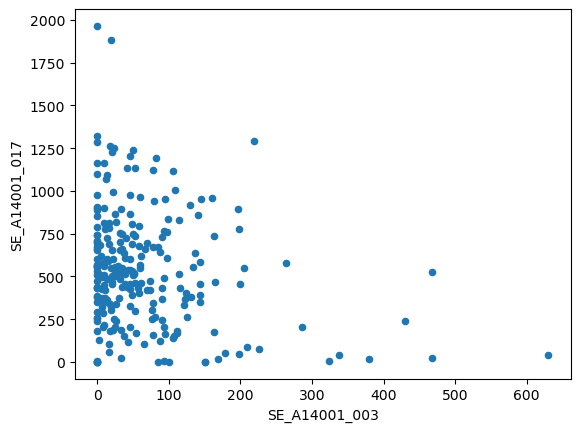

In [62]:
# plot household incomes 10-14k (x) and incomes over 200K
acs.plot.scatter(x='SE_A14001_003',y='SE_A14001_017')

## Sorting
I am going to make a bar chart that looks at census tracts with the highest median incomes. I am using median because there are 14 variables for household income that are broken into $5,000 intervals (e.g $10,000 - $14,999 ...). 

Using median income by census tract, I do not have to call as many variables. 
A14010_001

In [63]:
# new df that sorts tracts by median family income, starting at lowest 
acs_sorted = acs.sort_values(by='SE_A14010_001', ascending = True)

# display data 
acs_sorted[['Geo_FIPS','SE_A14010_001']].head(10)

,Geo_FIPS,SE_A14010_001
239,06075980501,23500.0
129,06075023103,31776.0
9,06075010701,32732.0
19,06075011300,36588.0
223,06075061101,43376.0
224,06075061102,45809.0
21,06075011800,50033.0
23,06075011902,51563.0
91,06075017903,53182.0
218,06075060502,53487.0


From this output, I can see that the lowest median family income by census tract is $23,500.

<Axes: title={'center': 'Top 10 Census Tracts with Lowest Median Family Income in San Francisco County in 2023'}, ylabel='Geo_FIPS'>

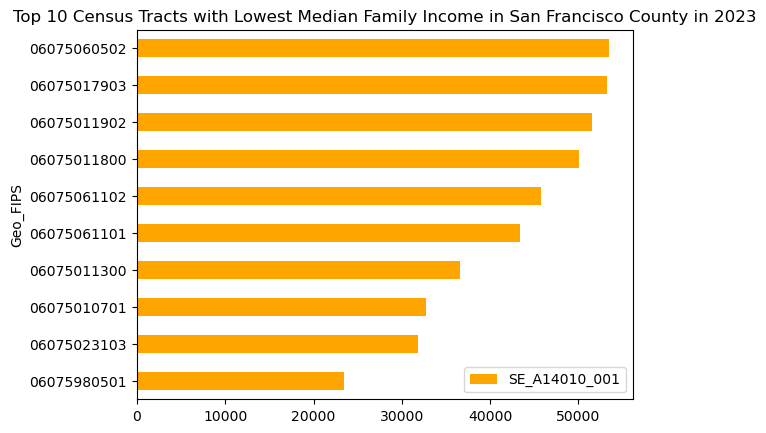

In [64]:
# plot it as a bar chart, sort the 10 tracts with the lowest median family income
acs_sorted.head(10).plot.barh(x='Geo_FIPS',
                            y='SE_A14010_001', 
                            title='Top 10 Census Tracts with Lowest Median Family Income in San Francisco County in 2023',
                            color='orange') # can change colors 

## Bar chart
I want to look at the poverty status in 2020 for the population under 18. In this variable, there are two options: living in poverty (below the poverty line) or living at or above poverty line. 

In [71]:
# check the data type of this variable to make sure its bool / binary
print(acs['SE_A13003A_002']) 

0       0
1       0
2       0
3       0
4       0
       ..
239     0
240    16
241    11
242     0
243     0
Name: SE_A13003A_002, Length: 244, dtype: int64


In [ ]:
# i want to make a bar chart that show

## Import SF Census Tracts Data
I will be imported the censu tract geojson data from (INSERT HERE) and attaching it to my acs census df. I will be merging on the FIPS column, and need to make sure that both datasets have the column name for a successful merge. 

In [73]:
# read in a geojson file of SF census tracts 
tracts = gpd.read_file('data/sf_2020_censusTract_data.geojson')

# display it 
tracts.head()

,name,intptlon,awater,mtfcc,aland,namelsad,tractce,statefp,data_loaded_at,intptlat,funcstat,countyfp,data_as_of,geoid,geometry
0,9805.01,-122.4193463,9769.0,G5020,1471536.0,Census Tract 9805.01,980501,06,2022-03-04,+37.7162081,S,075,2021-02-01,06075980501,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271..."
1,171.02,-122.4504754,0.0,G5020,294894.0,Census Tract 171.02,017102,06,2022-03-04,+37.7654353,S,075,2021-02-01,06075017102,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516..."
2,123.02,-122.4120970,0.0,G5020,92653.0,Census Tract 123.02,012302,06,2022-03-04,+37.7870222,S,075,2021-02-01,06075012302,"MULTIPOLYGON (((-122.415 37.78745, -122.41335 ..."
3,168.01,-122.4290133,0.0,G5020,226534.0,Census Tract 168.01,016801,06,2022-03-04,+37.7713309,S,075,2021-02-01,06075016801,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308..."
4,119.02,-122.4098067,0.0,G5020,93053.0,Census Tract 119.02,011902,06,2022-03-04,+37.7909959,S,075,2021-02-01,06075011902,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117..."


<Axes: >

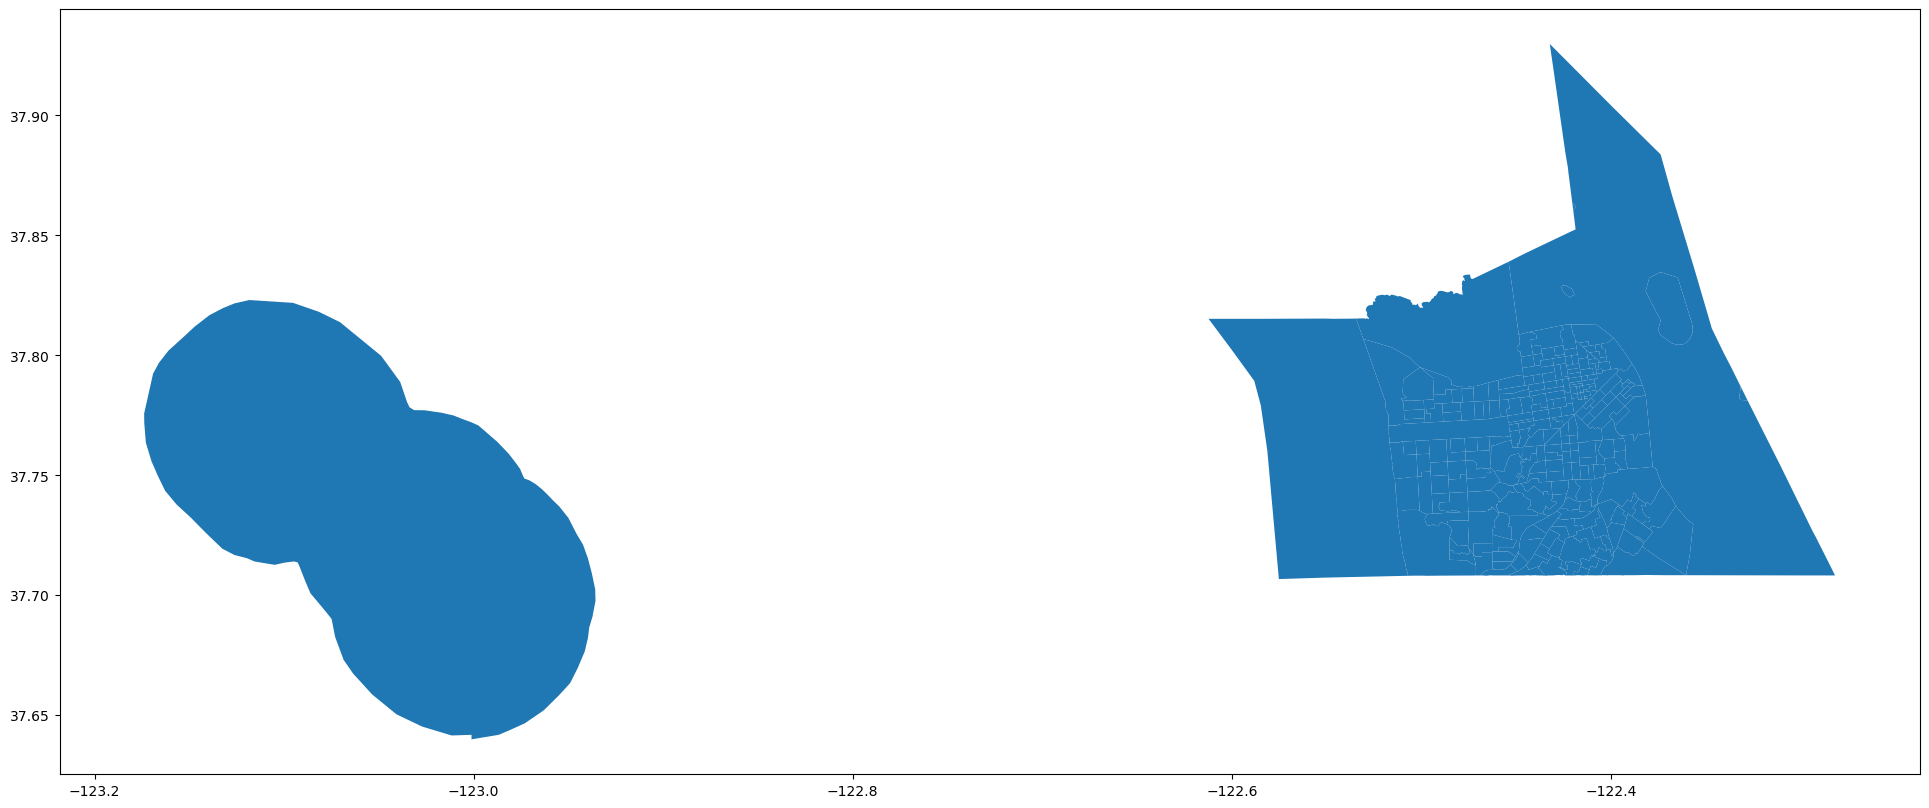

In [96]:
# plot it 
tracts.plot(figsize=(24,20)) # 24 by 20 pixels

In [75]:
# tell me more about this dataset
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            244 non-null    object        
 1   intptlon        244 non-null    object        
 2   awater          244 non-null    object        
 3   mtfcc           244 non-null    object        
 4   aland           244 non-null    object        
 5   namelsad        244 non-null    object        
 6   tractce         244 non-null    object        
 7   statefp         244 non-null    object        
 8   data_loaded_at  244 non-null    datetime64[ms]
 9   intptlat        244 non-null    object        
 10  funcstat        244 non-null    object        
 11  countyfp        244 non-null    object        
 12  data_as_of      244 non-null    datetime64[ms]
 13  geoid           244 non-null    object        
 14  geometry        244 non-null    geometry      
dty

In the tracts file, the column 'geoid' represents FIPS. The column data type is already an object, so there is no need to change it to prevent the leading zero problem.   

In [76]:
# subset the data to only incldue Geo_FIPS and geometry (for mapping)
tracts = tracts[['geoid','geometry']] # here Geo_FIPS = geoid

# check it 
tracts.head()

,geoid,geometry
0,06075980501,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271..."
1,06075017102,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516..."
2,06075012302,"MULTIPOLYGON (((-122.415 37.78745, -122.41335 ..."
3,06075016801,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308..."
4,06075011902,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117..."


Both datasets have a column that represents FIPS, but they hvae different names. To merge successfully, I will be changing the name on the tract 'geoid' column to 'Geo_FIPS' to match the acs df.  

In [78]:
# rename geoid column to Geo_FIPS
tracts = tracts.rename(columns={'geoid': 'Geo_FIPS'})

# check it
tracts.head()

,Geo_FIPS,geometry
0,06075980501,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271..."
1,06075017102,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516..."
2,06075012302,"MULTIPOLYGON (((-122.415 37.78745, -122.41335 ..."
3,06075016801,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308..."
4,06075011902,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117..."


Now, that the datasets have a common column, I can merge them by that column. 

In [79]:
# merge acs with tracts 
tracts_acs = tracts.merge(acs,on="Geo_FIPS")

#check it
tracts_acs.head()

,Geo_FIPS,geometry,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_CNECTA,...,SE_A10022_006,SE_A10022_007,SE_A10022_008,PCT_SE_A10022_002,PCT_SE_A10022_003,PCT_SE_A10022_004,PCT_SE_A10022_005,PCT_SE_A10022_006,PCT_SE_A10022_007,PCT_SE_A10022_008
0,06075980501,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271...","Census Tract 9805.01, San Francisco County, Ca...",ca,140,0,06,075,980501,.,...,0,0,123,0.00,0.00,0.00,0.00,0.00,0.00,100.00
1,06075017102,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516...","Census Tract 171.02, San Francisco County, Cal...",ca,140,0,06,075,17102,.,...,86,19,1244,19.12,17.88,7.09,5.20,5.59,1.24,80.88
2,06075012302,"MULTIPOLYGON (((-122.415 37.78745, -122.41335 ...","Census Tract 123.02, San Francisco County, Cal...",ca,140,0,06,075,12302,.,...,0,0,1822,3.39,3.39,3.39,0.00,0.00,0.00,96.61
3,06075016801,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308...","Census Tract 168.01, San Francisco County, Cal...",ca,140,0,06,075,16801,.,...,130,0,1779,10.92,10.92,3.96,0.45,6.51,0.00,89.08
4,06075011902,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117...","Census Tract 119.02, San Francisco County, Cal...",ca,140,0,06,075,11902,.,...,26,0,1606,4.29,4.29,1.85,0.89,1.55,0.00,95.71


In [80]:
# check dim 
tracts_acs.shape

(244, 237)

## Mapping (finally lol) 
Now, I am going to make a cloropleth map to show which census tracts have the most children living in poverty. 

First, I am going to check the distrbution to see if the data is skewed, which may affect my choice of coloring intervals. 

<Axes: ylabel='Frequency'>

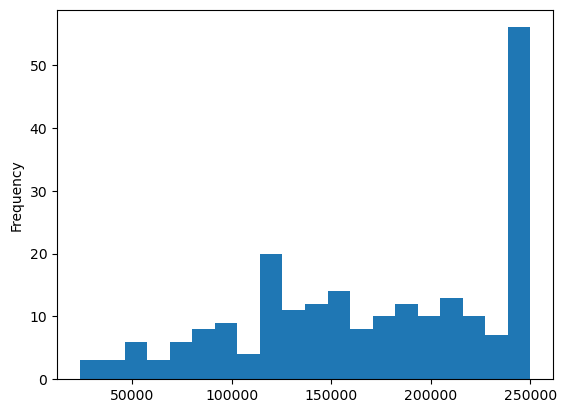

In [84]:
# check hist distribution of median income
acs['SE_A14010_001'].plot.hist(bins=20)

The distribution of median income by tract is skewed left, meaning that athere are some SF residents that are making much more than the remaining residents. 

For my map, this means that I will be using the natural breaks color scheme because it responds well to data with outliers.

First, I'm going to map the median family income because I hvae already worked in that column. 

<Axes: >

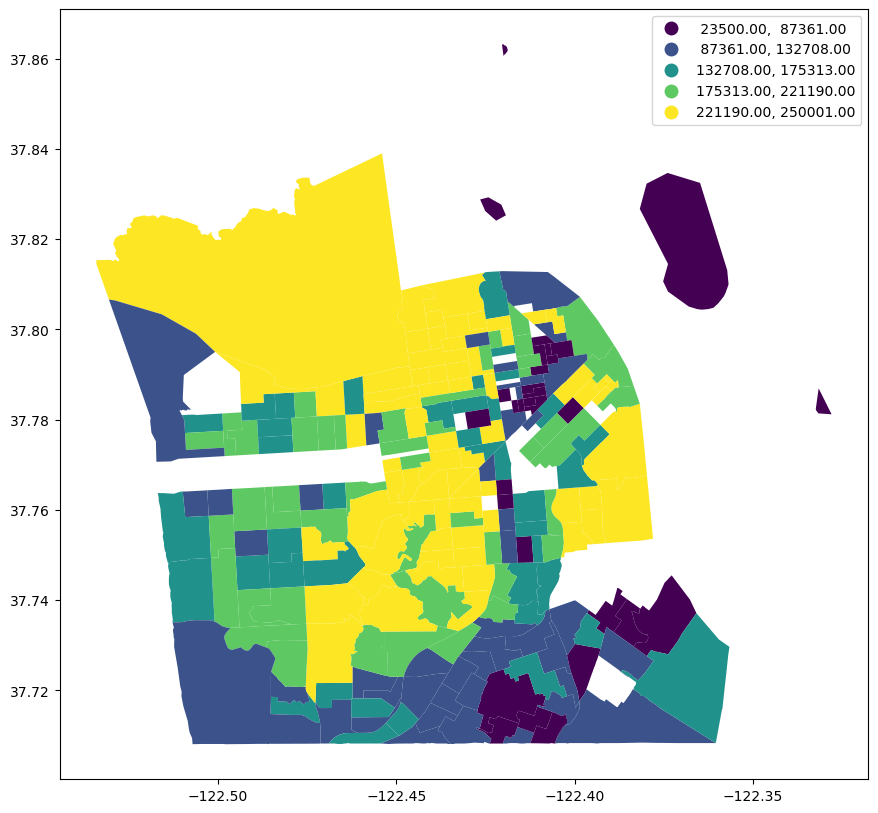

In [103]:
# map median family income by census tract 
tracts_acs.plot(figsize=(12,10),
                 column='SE_A14010_001', # median family income
                 legend=True, 
                 scheme='NaturalBreaks') # use natural  breaks color scheme                

Yay, a map! However, it looks like its just existing in space. Let's ground it by adding a basemap behind it. 

Also, let's change the colors using `colormaps` inside the `matplotlib` package. I found this information at the matplotlib website:

* https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [ ]:
# import matplotlib to improve my plot
import matplotlib.pyplot as plt

# get colormaps from matplotlib
from matplotlib import colormaps

<Axes: >

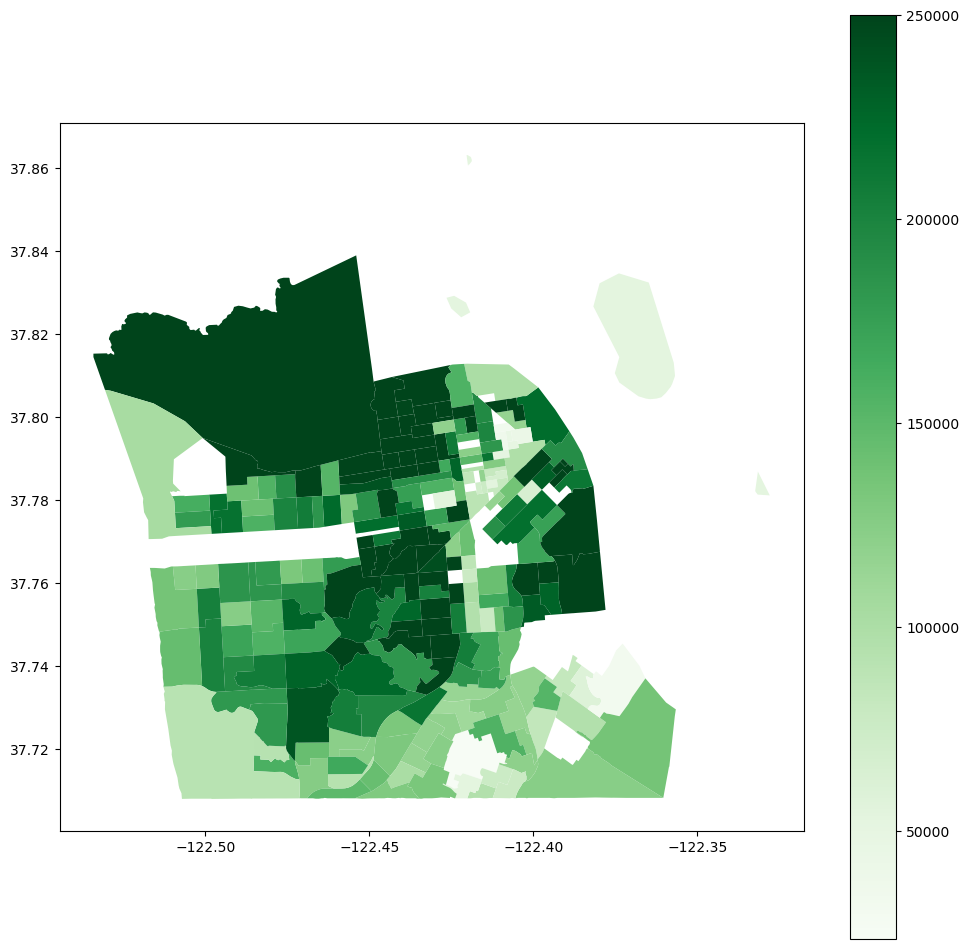

In [116]:
# make empty plot
fig,ax = plt.subplots(figsize=(12,12)) # empty plot

# add gdf to emplot plot
tracts_acs.plot(ax=ax, # the empty plot i made
                column='SE_A14010_001', # median family income variable
                legend=True,cmap='Greens') # dark green is highest incomes, 

<Axes: >

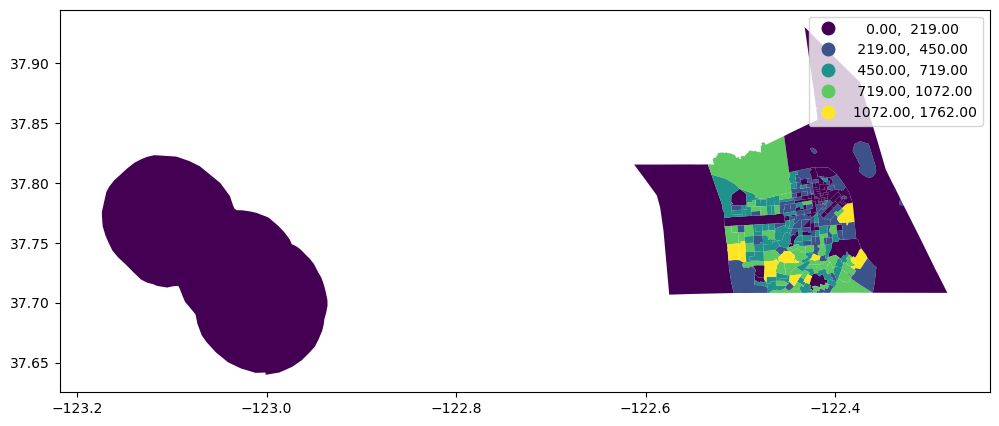

In [104]:
# map poverty status for pop under 18
# use natural  breaks color scheme 
tracts_acs.plot(figsize=(12,10),
                 column='SE_A13003A_001', # poverty in pop under 18
                 legend=True, 
                 scheme='NaturalBreaks')  

## Interative Maps!
Now, I am going to make sticky (interactive) map showing the median family income in SF. 

In [121]:
m = folium.Map(location=[37.78,-122.45], # average lat and long, sf? 
               zoom_start = 9, # zoom in moderately  
               tiles='CartoDB positron', # light gray base map
               attribution='CartoDB')

# plot chorpleth over the base map (color schemes)
folium.Choropleth(
                  geo_data=tracts_acs, # geo data
                  data=tracts_acs, # data, merging the data to create color map like we did to make tracts_race          
                  key_on='feature.properties.Geo_FIPS', # key, or merge column: go into features, then properities, then FIPS column
                  columns=['Geo_FIPS', 'SE_A14010_001'], # [key, value] Median Family income
                  fill_color='BuPu',
                name='Median Family Income',
                  line_weight=0.1, # how big the lines are
                  fill_opacity=0.8, # how see-through vs opaque it is 
                  line_opacity=0.2, # line opacity (of the border)
                  legend_name='Median Family Income (2020)').add_to(m)    # name on the legend color bar

folium.LayerControl().add_to(m)

m

# to add layers, make the map a variable (set it equal to something) 
# missing area is black